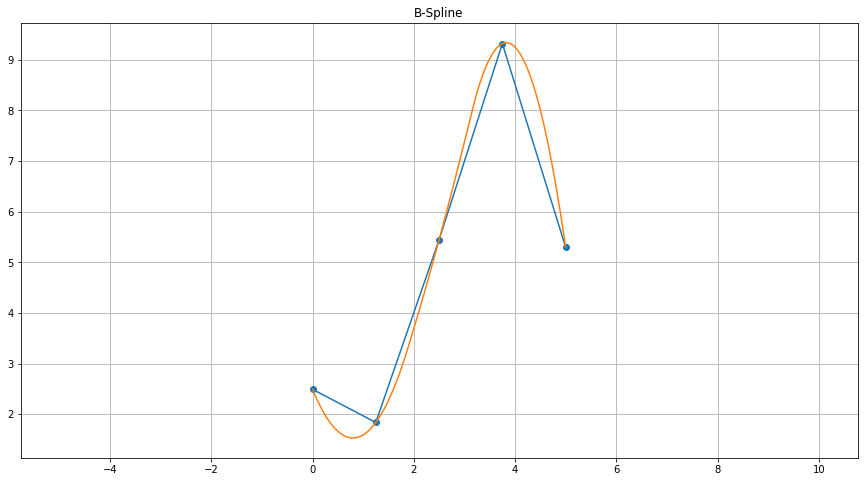

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import splev, splrep, BSpline
x = np.linspace(0, 5, 5)
np.random.seed(42)
noise = np.random.normal(0,3,len(x))
y = x + 1 + noise

# y[len(x) - 3] = -3

degree = 2
spl = splrep(x, y,k=degree)

# k = 2
# t = [0, 1, 2, 3, 4, 5, 6,7,8]
t = spl[0]
c = spl[1]
k = spl[2]

# t = [1,2,3,4,5,6,7,8,9]

spl_BSpline = BSpline(t, c, k)

fig = plt.figure(figsize=(15,8))
x2 = np.linspace(0, len(x), 200)
y2 = splev(x2, spl)
plt.plot(x, y, 'o-')
# plt.plot(x2, y2,lw=3)

y3 = splev(x2, spl_BSpline)
plt.plot(x2, y3)

plt.title("B-Spline")
plt.grid(True)
plt.axis('equal')
plt.show()

Knot vector: [0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 1.0, 1.0, 1.0]


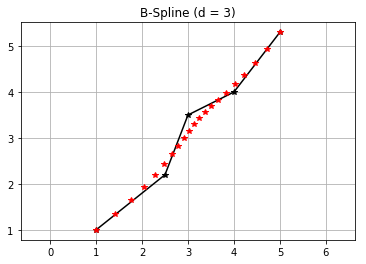

In [43]:
from geomdl import BSpline

# Create a 3-dimensional B-spline Curve
curve = BSpline.Curve()

# Set degree
curve.degree = 3
x = [1,2.5,3,4,5]
y = [1,2.2,3.5,4,5.3]
# Set control points
curve.ctrlpts = [[x[0], y[0]], [x[1], y[1]], [x[2], y[2]], [x[3], y[3]], [x[4], y[4]]]

# Set knot vector
# curve.knotvector = [0, 0, 0, 0, 1, 1, 1, 1]
curve.knotvector = [0,0,0,0,1,2,2,2,2]
# curve.knotvector = [0,1,2,3,4,5,6,7,8]
print("Knot vector:",curve.knotvector)


# Set evaluation delta (controls the number of curve points)
curve.delta = 0.05

# Get curve points (the curve will be automatically evaluated)
curve_points = curve.evalpts

spline_points = np.array(curve_points)

# fig = plt.figure(figsize=(15,8))
plt.plot(x,y,'k-*')
plt.plot(spline_points[:,0],spline_points[:,1],'r*')
plt.title("B-Spline (d = "+str(curve.degree)+")")
plt.grid(True)
plt.axis('equal')
plt.show();

Knot vector: [0.0, 0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.7142857142857143, 0.8571428571428571, 1.0]


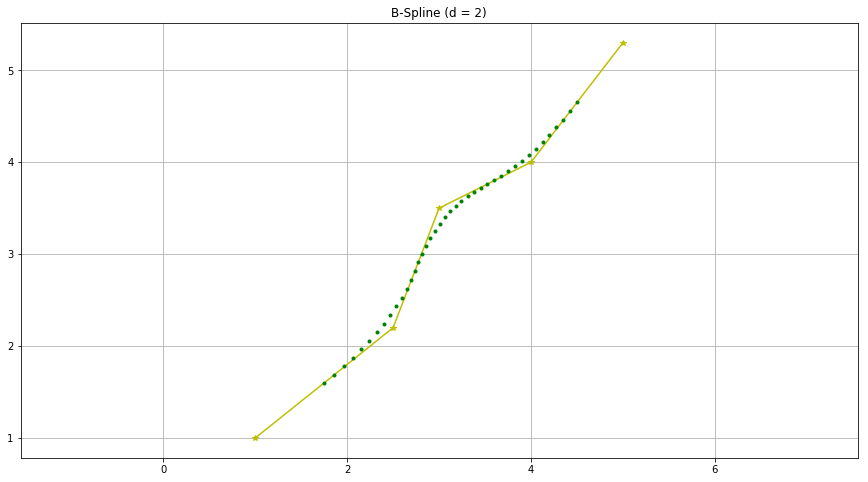

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from geomdl import BSpline

# Create a 3-dimensional B-spline Curve
curve = BSpline.Curve()

# Set degree
curve.degree = 2
x = [1,2.5,3,4,5]
y = [1,2.2,3.5,4,5.3]
# Set control points
# Need at least degree + 1 control points
curve.ctrlpts = [[x[0], y[0]], [x[1], y[1]], [x[2], y[2]], [x[3], y[3]], [x[4], y[4]]]

# Set knot vector
# d - degree
# n - number of control points
# s - knot vector length which must be d + n + 1
# Another way of phrasing it: o + n, where o - order of basis functions
# curve.knotvector = [0,1,2,3,4,5,6] # degree 1
# curve.knotvector = [0,1,2,3,4,5,6,7] # degree 2
curve.knotvector = np.linspace(0,len(x) + curve.degree,len(x) + curve.degree + 1)
print("Knot vector:",curve.knotvector)


# Set evaluation delta (controls the number of curve points)
curve.delta = 0.025
# Get curve points (the curve will be automatically evaluated)
curve_points = curve.evalpts

spline_points = np.array(curve_points)

fig = plt.figure(figsize=(15,8))
plt.plot(x,y,'y-*')
plt.plot(spline_points[:,0],spline_points[:,1],'g.')
plt.title("B-Spline (d = "+str(curve.degree)+")")
plt.grid(True)
plt.axis('equal')
plt.show();